In [1]:
# https://en.wikipedia.org/wiki/International_Talk_Like_a_Pirate_Day



![Global Average Temperature vs. Number of Pirates](1280px-PiratesVsTemp(en).svg.png)

In [2]:
# extract data from graph:  https://apps.automeris.io/wpd/
# extract data using Webplotdigitizer, add manual observations for later data corrections, save as 
# pirates_vs_temperature_minimal_years.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("pirates_vs_temperature_minimal_years.csv")
df

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820,35000,32653.557,14.216
1,1860,45000,9212.045,14.312
2,1880,20000,2648.141,14.607
3,1920,15000,761.238,14.910
4,1940,5000,214.674,15.205
5,1980,400,62.895,15.591
6,2000,17,17.568,15.879
7,2020,0,0.000,17.499


In [5]:
df2 = df.interpolate(axis=0, method="time")
df2

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820,35000,32653.557,14.216
1,1860,45000,9212.045,14.312
2,1880,20000,2648.141,14.607
3,1920,15000,761.238,14.910
4,1940,5000,214.674,15.205
5,1980,400,62.895,15.591
6,2000,17,17.568,15.879
7,2020,0,0.000,17.499


In [6]:
df3 = df.copy()
df3 = df3[0:0]
df3

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C


In [7]:
years_included = df2["year"].unique()
years_included

array([1820, 1860, 1880, 1920, 1940, 1980, 2000, 2020], dtype=int64)

In [8]:
display(years_included[-1])

2020

In [9]:
df3 = df.copy()
df3

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820,35000,32653.557,14.216
1,1860,45000,9212.045,14.312
2,1880,20000,2648.141,14.607
3,1920,15000,761.238,14.910
4,1940,5000,214.674,15.205
5,1980,400,62.895,15.591
6,2000,17,17.568,15.879
7,2020,0,0.000,17.499


In [10]:
import numpy as np
columns=["year", "num_pirates_labeled", "num_pirates_extracted", "global_avg_temp_C"]
temp = [1821,"","" ,""]
df_temp = pd.DataFrame([temp], columns=columns).fillna(np.nan)
df_temp

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1821,,,


In [11]:
df3 = df3.append(df_temp, ignore_index=True)
df3

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820,35000,32653.6,14.216
1,1860,45000,9212.05,14.312
2,1880,20000,2648.14,14.607
3,1920,15000,761.238,14.91
4,1940,5000,214.674,15.205
5,1980,400,62.895,15.591
6,2000,17,17.568,15.879
7,2020,0,0,17.499
8,1821,,,


In [12]:
df3 = df.copy()

for i, year in enumerate(years_included):
    next_year = year + 1
    max_year = years_included[-1]
    
    if i < len(years_included -1):
        while next_year < max_year -1 and next_year <= years_included[i+1]:
            temp_list = [next_year, "", "", ""]
            df_temp = pd.DataFrame([temp_list], columns=columns).fillna(np.nan)
            df3 = df3.append(df_temp, ignore_index=True)
            # print(temp_list)
            next_year += 1

df3 = df3.sort_values("year").reset_index(drop=True)
df3.head(60)

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820,35000,32653.6,14.216
1,1821,,,
2,1822,,,
3,1823,,,
4,1824,,,
5,1825,,,
6,1826,,,
7,1827,,,
8,1828,,,
9,1829,,,


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 4 columns):
year                     206 non-null int64
num_pirates_labeled      206 non-null object
num_pirates_extracted    206 non-null object
global_avg_temp_C        206 non-null object
dtypes: int64(1), object(3)
memory usage: 6.6+ KB


In [14]:
df3 = df3[columns].apply(pd.to_numeric, errors='coerce')
df3["year"] = pd.to_datetime(df3["year"], format="%Y")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 4 columns):
year                     206 non-null datetime64[ns]
num_pirates_labeled      8 non-null float64
num_pirates_extracted    8 non-null float64
global_avg_temp_C        8 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.6 KB


In [15]:
df3.head(5)

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820-01-01,35000.0,32653.557,14.216
1,1821-01-01,NaN,NaN,NaN
2,1822-01-01,NaN,NaN,NaN
3,1823-01-01,NaN,NaN,NaN
4,1824-01-01,NaN,NaN,NaN


In [16]:
df4 = df3.interpolate()
# (axis=1, method="time", limit_direction ='forward')
df4.head(10)

,year,num_pirates_labeled,num_pirates_extracted,global_avg_temp_C
0,1820-01-01,35000.0,32653.5570,14.2160
1,1821-01-01,35250.0,32067.5192,14.2184
2,1822-01-01,35500.0,31481.4814,14.2208
3,1823-01-01,35750.0,30895.4436,14.2232
4,1824-01-01,36000.0,30309.4058,14.2256
5,1825-01-01,36250.0,29723.3680,14.2280
6,1826-01-01,36500.0,29137.3302,14.2304
7,1827-01-01,36750.0,28551.2924,14.2328
8,1828-01-01,37000.0,27965.2546,14.2352
9,1829-01-01,37250.0,27379.2168,14.2376


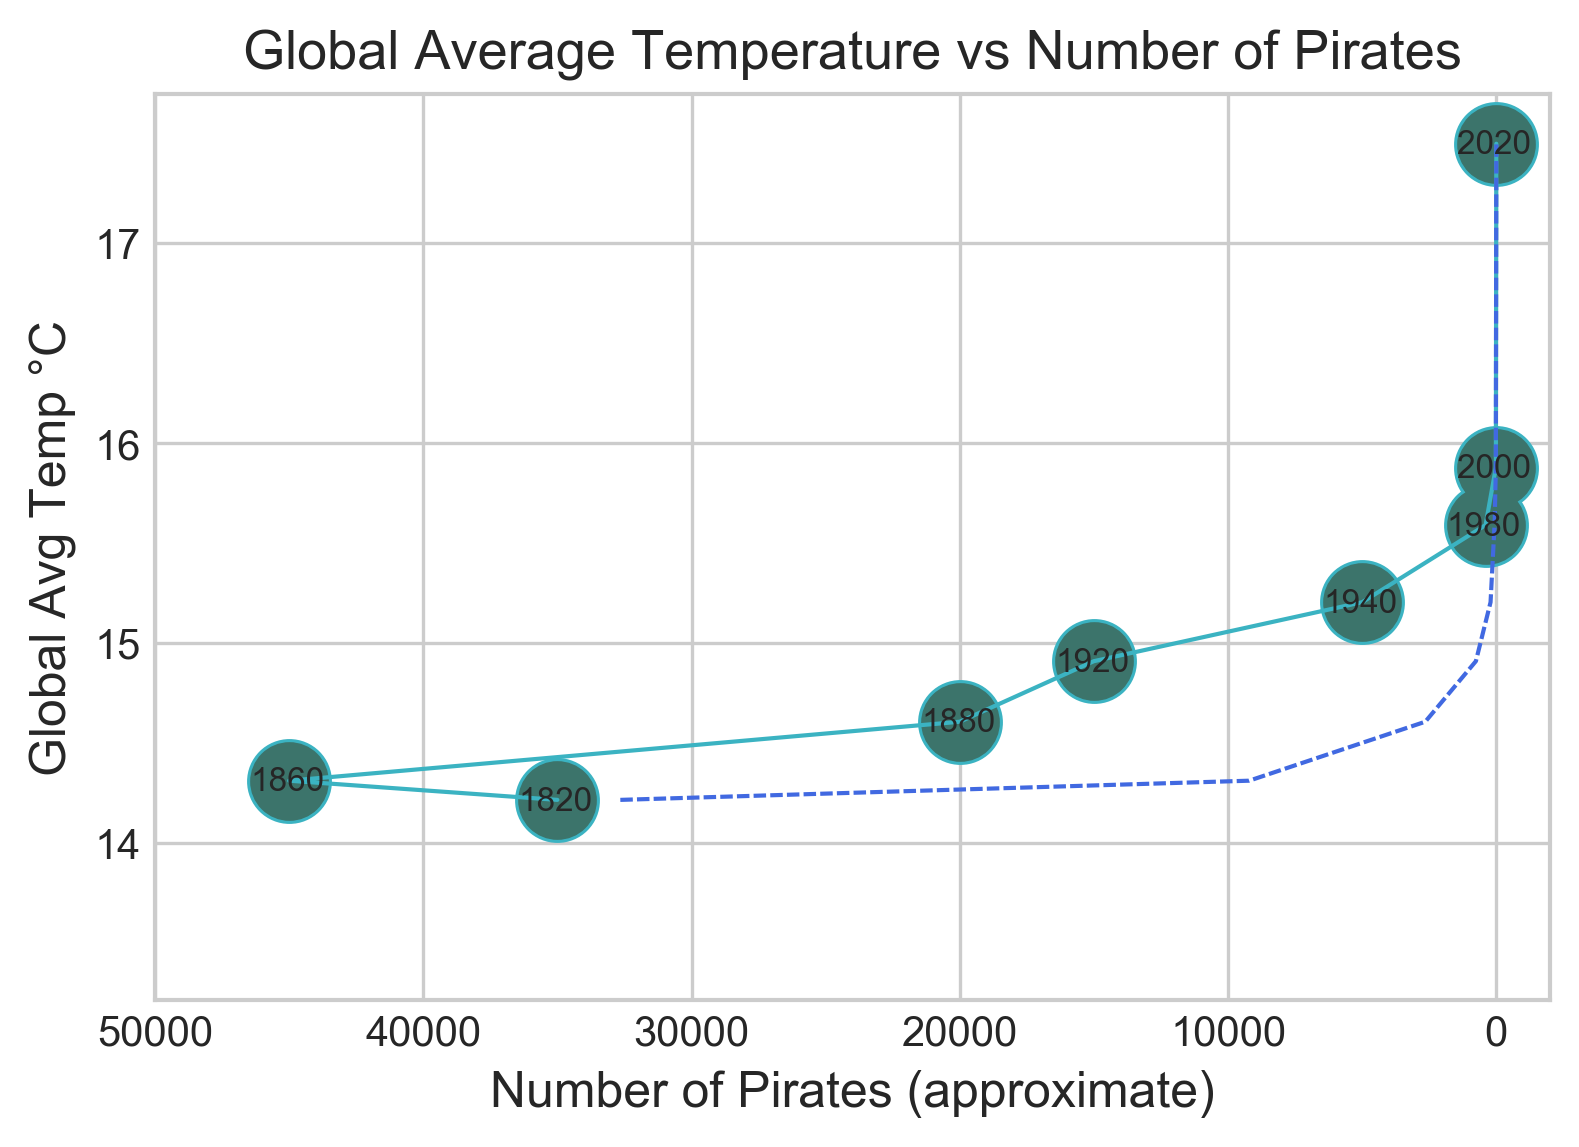

In [28]:
plt.figure(num=None, figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k');
plt.style.use('seaborn-whitegrid');

# multiple line plot"
plt.title("Global Average Temperature vs Number of Pirates", loc='center', fontsize=13)
plt.xlim(df4["num_pirates_labeled"].max() + 5000, -2000)  # reverse order of high-low values to reverse axis
plt.ylim(df4["global_avg_temp_C"].min() - 1, df4["global_avg_temp_C"].max() + .25)
plt.xlabel("Number of Pirates (approximate)", fontsize=12)
degree_sign= u'\N{DEGREE SIGN}'
plt.ylabel(f"Global Avg Temp {degree_sign}C", fontsize=12)

# plot data - but add bubbles only for original data
plt.plot("num_pirates_labeled", "global_avg_temp_C", data=df, color='#3BB3C2', linewidth=1)  # original
plt.plot("num_pirates_extracted", "global_avg_temp_C", data=df4, color='royalblue', linewidth=1, dashes=[3, 1])  # interpolated

# add initial years; NOTE: different df
plt.scatter("num_pirates_labeled", "global_avg_temp_C", data=df, s=375, color='#3BB3C2')  
plt.scatter("num_pirates_labeled", "global_avg_temp_C", data=df, s=320, color='#3C746B')

# label points with text of the year
for year in df["year"].tolist():
    row = df[df["year"] == year]
    x = row.iloc[0]["num_pirates_labeled"]
    y = row.iloc[0]["global_avg_temp_C"]
    plt.text(x + 1450, y -.05, year, fontsize=8)
    
plt.show()

![Global Average Temperature vs. Number of Pirates](1280px-PiratesVsTemp(en).svg.png)